In [1]:
from models import Entity, Environment
import numpy as np
import torch
import torch.utils.data as Data
import matplotlib.pyplot as plt
import time

In [2]:
x_arr = torch.linspace(-1, 1, 500)
y_arr = torch.exp(x_arr) + torch.normal(0, 0.02, size=(500,))
dataset = Data.TensorDataset(x_arr.unsqueeze(1),y_arr.unsqueeze(1))
train_loader = Data.DataLoader(
	dataset=dataset,
    batch_size=5, # Divided into batches
    shuffle=True  # Whether to disrupt the data, the default is False
)

In [3]:
x_val = torch.linspace(1, 1.2, 50)
y_val = torch.exp(x_val) + torch.normal(0, 0.02, size=(50,))
dataset = Data.TensorDataset(x_val.unsqueeze(1), y_val.unsqueeze(1))
val_loader = Data.DataLoader(
	dataset=dataset,
    batch_size=5, # Divided into batches
    shuffle=True  # Whether to disrupt the data, the default is False
)

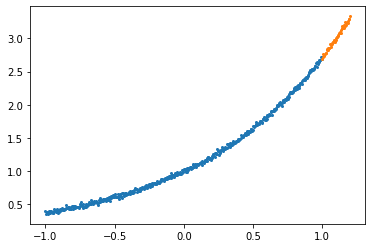

In [4]:
plt.plot(x_arr, y_arr, marker="o", lw=0, markersize=2)
plt.plot(x_val, y_val, marker="o", lw=0, markersize=2)

In [5]:
env = Environment(10, train_loader, train_epochs=20, validation_loader=val_loader)

cuda


In [6]:
env.train_epoch()

In [7]:
env.validate_entities()

[nan,
 0.04612481355667114,
 0.192786762714386,
 0.08397434949874878,
 0.1334353244304657,
 0.09357652425765992,
 0.19606618881225585,
 1.1006003665924073,
 0.02219473510980606,
 0.41110748767852784]

In [18]:
m = env.entities[8]
m.gens

{'layers': [{'type': 'Linear', 'in': 1, 'out': 38},
  {'type': 'Tanh', 'in': 38, 'out': 38},
  {'type': 'Linear', 'in': 38, 'out': 36},
  {'type': 'Linear', 'in': 36, 'out': 4},
  {'type': 'Linear', 'in': 4, 'out': 1},
  {'type': 'Linear', 'in': 4, 'out': 1}],
 'criterion': 'MSELoss',
 'optimizer': {'name': 'Adam', 'lr': 0.18286651892877495}}

In [9]:
y = m.predict(x_arr.unsqueeze(1))

In [10]:
l = m.loss(y, y_arr.unsqueeze(1))

In [11]:
l.item()

0.013723746873438358

In [12]:
print(m.gens)

{'layers': [{'type': 'Linear', 'in': 1, 'out': 13}, {'type': 'Linear', 'in': 13, 'out': 39}, {'type': 'Sigmoid', 'in': 39, 'out': 39}, {'type': 'ReLU', 'in': 39, 'out': 39}, {'type': 'Linear', 'in': 39, 'out': 17}, {'type': 'ReLU', 'in': 17, 'out': 17}, {'type': 'ReLU', 'in': 17, 'out': 17}, {'type': 'Linear', 'in': 17, 'out': 1}], 'criterion': 'MSELoss', 'optimizer': {'name': 'Adam', 'lr': 0.0777255244612465}}


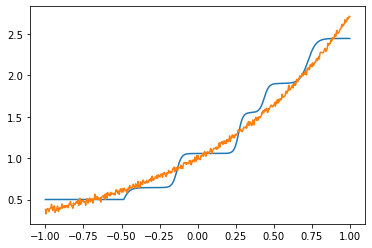

In [13]:
plt.plot(x_arr, y.squeeze(1))
plt.plot(x_arr, y_arr)

In [8]:
env.evo_step()

In [9]:
env.train_epoch()
env.validate_entities()

[0.05846162408590316,
 0.8110813140869141,
 0.21876848697662354,
 0.22539398670196534,
 0.03817266970872879,
 0.6894404697418213,
 0.08969052910804749,
 0.4997022438049316,
 0.386803879737854,
 0.46452940940856935]

In [10]:
for i in range(10):
    env.train_epoch()
    print(env.validate_entities())
    env.evo_step()
    print(f"Evo step: {i}")

[0.1126094537973404, 0.811080231666565, 0.1295402991771698, 0.17287914872169494, 0.020904589369893072, 0.7139916610717774, 0.08026716709136963, 0.665744104385376, 0.3928840136528015, 0.3598056888580322]
Evo step: 0
[1.8134666633605956, 0.811080207824707, 0.074123774766922, 0.1423386526107788, 0.11086396336555482, 0.6140445470809937, 0.07951575458049774, 0.425726580619812, 0.17614706158638, 0.461510820388794]
Evo step: 1
[1.8134667205810548, 0.8110802221298219, 0.12950254678726197, 0.017123085111379624, 0.0593415942788124, 0.29877594470977786, 0.12227361679077149, 1.524387435913086, 0.09262913107872009, 0.4222511053085327]
Evo step: 2
[1.8134667205810548, 0.8110802793502808, 0.0335619443655014, 0.03812588065862656, 0.06149854332208633, 0.8432819843292236, 0.1350904333591461, 0.9797610282897949, 0.11277987122535707, 0.3011819100379944]
Evo step: 3
[0.07076515436172486, 0.8110889625549316, 0.40119432449340825, 0.0483627912402153, 0.14801937341690063, 0.5863604021072388, 0.413039128780365,

/home/grishakl/.local/lib/python3.8/site-packages/torch/nn/init.py:388: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


[1.8134667015075685, 0.8110907316207886, 0.4011946725845337, 0.13563677191734314, 0.7367932558059692, 0.6235750246047973, 0.4043428826332092, 0.5257914113998413, 0.19336002349853515, 0.381945960521698]
Evo step: 8
[1.813466739654541, 0.8110926151275635, 0.4011932444572449, 0.058072493672370905, 0.0009032351011410356, 0.4753003311157227, 0.4042594623565674, 0.6762128686904907, 0.023231403082609174, 0.4309629106521607]
Evo step: 9


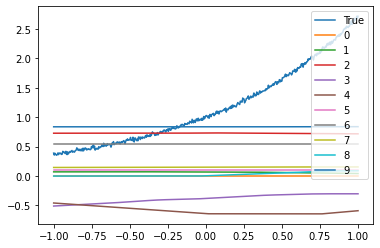

In [12]:
plt.plot(x_arr, y_arr, label="True")
for i, ent in enumerate(env.entities):
    y = ent.predict(x_arr.unsqueeze(1))
    plt.plot(x_arr, y.squeeze(1), label=str(i))
plt.legend()
plt.show()

In [9]:
env = Environment(10, train_loader, train_epochs=100, validation_loader=val_loader)

cuda


Exec time: 64 s


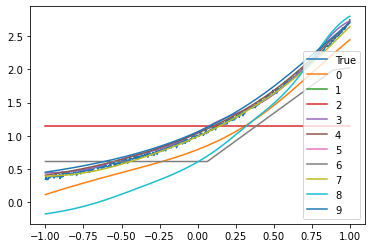

In [10]:
start_time = time.time()
env.train_epoch()
print(f"Exec time: {(time.time() - start_time):.0f} s")
plt.plot(x_val, y_val, label="True")
for i, ent in enumerate(env.entities):
    y = ent.predict(x_val.unsqueeze(1))
    plt.plot(x_val, y.squeeze(1), label=str(i))
plt.legend()
plt.show()

[0.07557126402854919, nan, 0.6953559541702271, 0.037414020672440526, 0.0023991711158305408, nan, 0.19048965573310853, 0.03134535044431687, 0.03012575186789036, 0.004718053750693798]
Exec time: 83 s


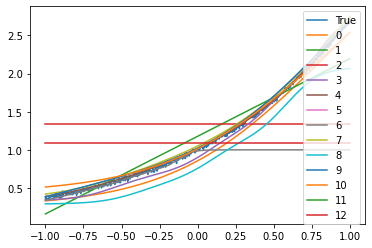

In [11]:
print(env.validate_entities())
start_time = time.time()
env.evo_step()
env.train_epoch()
print(f"Exec time: {(time.time() - start_time):.0f} s")
plt.plot(x_val, y_val, label="True")
for i, ent in enumerate(env.entities):
    y = ent.predict(x_val.unsqueeze(1))
    plt.plot(x_val, y.squeeze(1), label=str(i))
plt.legend()
plt.show()